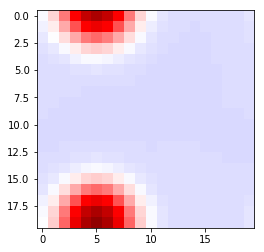

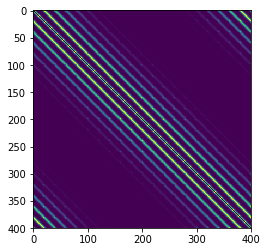

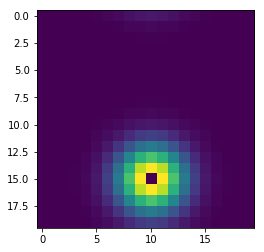

(400, 400)


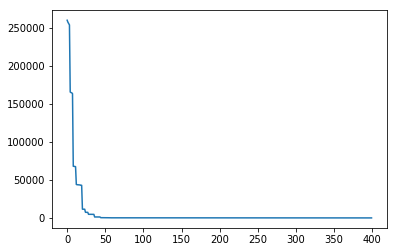

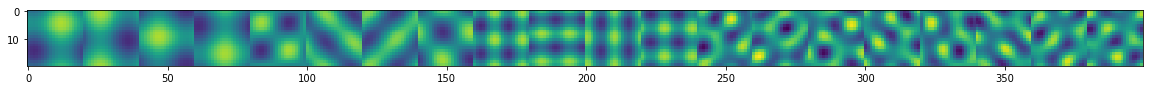

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from htmresearch.support.gridcells.grids_from_pca.utils import (gaussian_encoder,
                                                                create_random_walk_from_transition_fct,
                                                                transition_from_matrix,
                                                                create_transition_matrix)
from scipy.special import expit as sigmoid
%matplotlib inline

%load_ext autoreload
%autoreload 2



n_ = 20
n  = n_**2

wrap = True

T      = create_transition_matrix(n_, wrap, sigma=9.0, with_diagonal=False)
tr_fct = transition_from_matrix(T)
enc    = gaussian_encoder((n_,n_), wrap, sigma = 9.)



X = create_random_walk_from_transition_fct(tr_fct, enc, n, 200000)
mean = np.mean(X, axis=0, keepdims=True)
# print np.amin(mean), np.amax(mean)


X = X - mean

    

plt.imshow(X[0].reshape((n_,n_)), cmap="seismic", vmin=-1, vmax=1)
plt.show()


plt.imshow(T)
plt.show()
plt.imshow(T[310].reshape((n_,n_)))
plt.show()


# plt.imshow(mean.reshape((n_,n_)))
# plt.show()

# mean2 = np.mean(X, axis=0, keepdims=True)
# print np.amin(mean2), np.amax(mean2)
# plt.imshow(mean2.reshape((n_,n_)))
# plt.show()

G = np.dot(X.T,X)

lam, vec = np.linalg.eigh(G)
sorted_indices = np.argsort(lam)[::-1]
lam = lam[sorted_indices]
vec = vec[:, sorted_indices].T
print vec.shape
plt.plot(lam)
plt.show()

img = np.concatenate( [vec[i].reshape((n_,n_)) for i in range(0,20)], axis = 1)


plt.figure(figsize=(20,5))
plt.imshow(img)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(100000, 2)
(100000,)
(100000, 625)


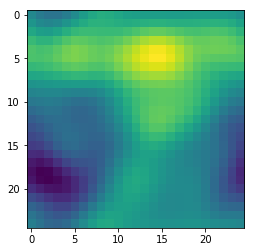

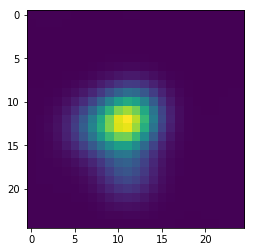

(625,)


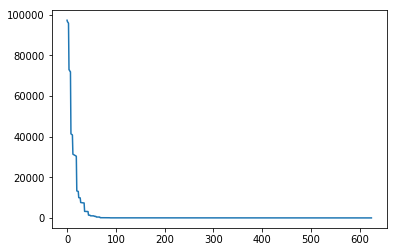

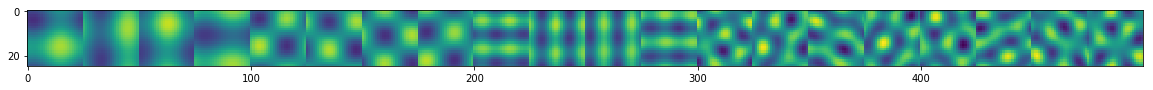

In [19]:

from htmresearch.support.gridcells.random_walk import smooth_torus_walk
%load_ext autoreload
%autoreload 2





# ------------------------
# Computing the torus walk
# ------------------------

Z, V = smooth_torus_walk(100000, start=[0.5,0.5], min_speed=0.3, max_speed=0.3, sigma=0.2)

print Z.shape

X_ = (Z*n_).astype(int)
X_ = X_[:,0]*n_ + X_[:,1] 

print X_.shape

X = np.zeros((len(X_), n) )
for t in range(len(X_)):
    X[t] = enc(X_[t])

mean = np.mean(X, axis=0, keepdims=True)    

X = X - mean
print X.shape
plt.imshow(mean.reshape((n_,n_)))
plt.show()
plt.imshow(sum([ x.reshape((n_,n_)) for x in X[:7]   ]))
plt.show()

G = np.dot(X.T,X)

lam, vec = np.linalg.eigh(G)
sorted_indices = np.argsort(lam)[::-1]
lam = lam[sorted_indices]
vec = vec[:, sorted_indices].T


print lam.shape

plt.plot(lam)
plt.show()

img = np.concatenate( [vec[i].reshape((n_,n_)) for i in range(0,20)], axis = 1)


plt.figure(figsize=(20,5))
plt.imshow(img)
plt.show()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


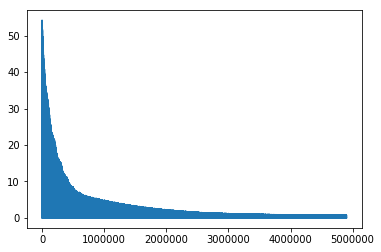

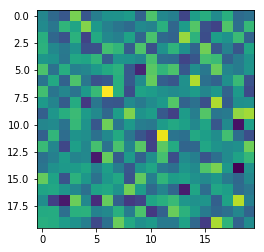

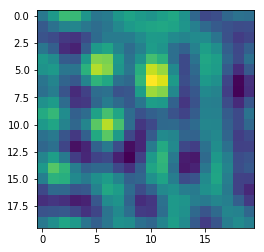

In [18]:
from htmresearch.support.gridcells.grids_from_pca.utils import (oja_w1, oja, mca)

G = np.dot(X.T,X)
W = np.random.randn(1,n)

i = 0

l = []
for epoch in range(50):
    print epoch
#     perm = np.random.permutation(len(X))
#   l = l + oja_w1(W, (X)[:100000], 0.0001, False)
    l = l + mca(W, (X)[:100000], 0.0001, False)

plt.plot(l[100000:])
plt.show()
    
imgs = [W[i].reshape((n_,n_)) for i in range(W.shape[0])]
img = np.concatenate( imgs, axis = 1)

# plt.figure(figsize=(20,10))
plt.imshow(img)
plt.show()

G_imgs = [ np.dot(G,img.reshape((n,1))).reshape((n_,n_)) for img in imgs ]

plt.imshow(np.concatenate( G_imgs, axis = 1))
plt.show()


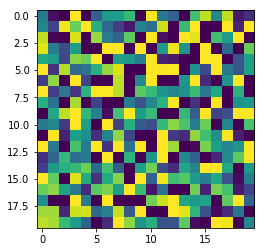

In [27]:
plt.imshow(img, vmin=-1,vmax=1)
plt.show()

In [42]:
l = []
for epoch in range(10):
    print epoch
#     perm = np.random.permutation(len(X))
#   l = l + oja_w1(W, (X)[:100000], 0.0001, False)
    l = l + mca(W, (X)[:100000], 0.000001, False)


0
1
2
3
4
5
6
7
8
9


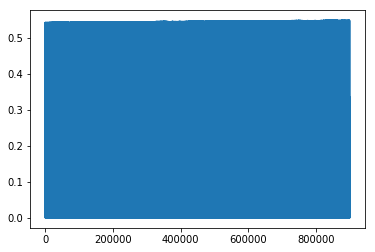

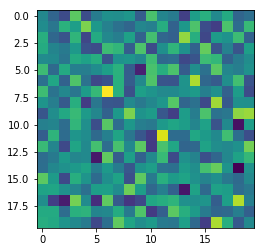

In [43]:
plt.plot(l[100000:])
plt.show()
    
imgs = [W[i].reshape((n_,n_)) for i in range(W.shape[0])]
img = np.concatenate( imgs, axis = 1)

# plt.figure(figsize=(20,10))
plt.imshow(img)
plt.show()